# Covid Dataset

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
ds=pd.read_csv('covid.csv',parse_dates=['Date'])

In [79]:
df=pd.DataFrame(ds)

In [80]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [81]:
df.shape

(23688, 5)

In [82]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [84]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [85]:
country=df.groupby('Country').sum()

In [86]:
country.sort_values('Deaths',ascending=False)

,Confirmed,Recovered,Deaths
Country,,,
US,57098767,8428678,3221969
Italy,11896347,4354815,1568276
United Kingdom,9150537,43829,1329006
Spain,11890691,5770271,1302010
France,8746538,2519190,1209634
...,...,...,...
Saint Vincent and the Grenadines,793,379,0
Fiji,979,476,0
Cambodia,8024,5888,0


 The highest death are found in US. italy,UK,Spain and france also has higher death 

In [87]:
country.sort_values('Confirmed',ascending=False)

,Confirmed,Recovered,Deaths
Country,,,
US,57098767,8428678,3221969
Italy,11896347,4354815,1568276
Spain,11890691,5770271,1302010
United Kingdom,9150537,43829,1329006
Germany,9046257,6102898,319666
...,...,...,...
Bhutan,608,209,0
MS Zaandam,512,0,112
Papua New Guinea,359,184,0


Highest cases are found in US

In [89]:
df_month=pd.DataFrame(df)

In [94]:
df_month['month']=df['Date'].dt.month_name()
df_month[['confirm','recover','death']]=df[['Confirmed','Recovered','Deaths']]

In [99]:
df_month.groupby('month').sum().sort_values('confirm',ascending=False)

,confirm,recover,death
month,,,
May,115121451,41747602,7746343
April,63046693,16322390,4291044
March,8899917,2706089,396863
February,1671783,380794,46898
January,38534,844,889


The highest Cases are found in the month of May

In [12]:
df.drop(['Date','Country'],axis=1,inplace=True)

In [13]:
df.head()

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


# Dealing with Null Values

In [14]:
df.isnull().sum()

Confirmed    0
Recovered    0
Deaths       0
dtype: int64

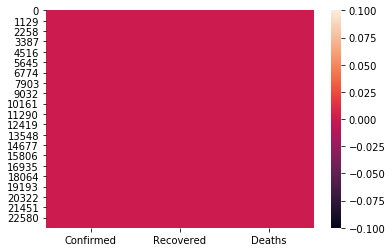

In [15]:
sns.heatmap(df.isnull())

there is no null value in this dataset

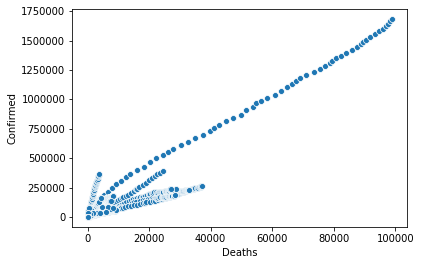

In [16]:
sns.scatterplot(df.Deaths,df.Confirmed)

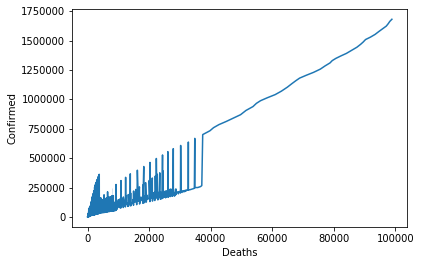

In [17]:
sns.lineplot(df.Deaths,df.Confirmed)

we can see that dath is also increase with the increase in no of case

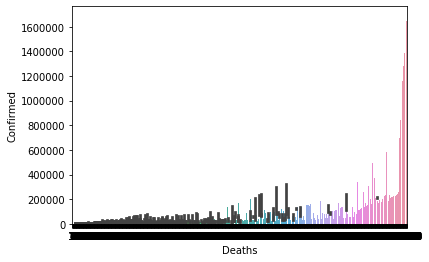

In [92]:
sns.barplot(df.Deaths,df.Confirmed)

the death is start increasing with the increase in the confirm cases

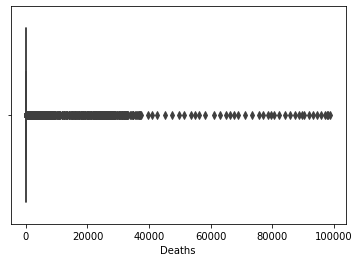

In [100]:
sns.boxplot(df.Deaths)

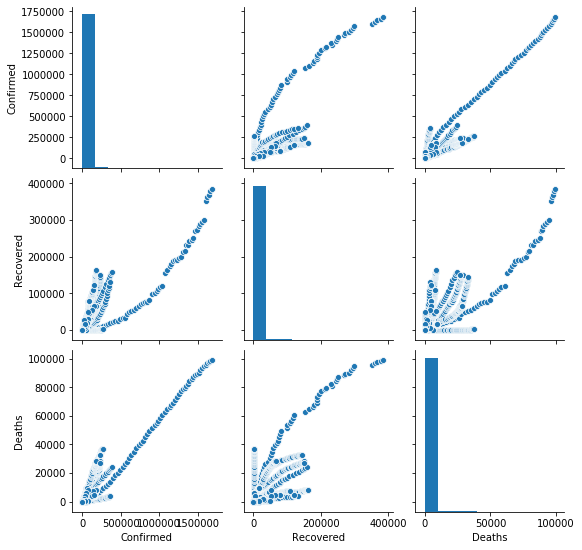

In [102]:
sns.pairplot(df)

# Removing Outliers

In [19]:
from scipy.stats import zscore

In [20]:
z=np.abs(zscore(df))

In [21]:
df_new=df[(z<3).all(axis=1)]

In [22]:
df.shape

(23688, 3)

In [23]:
df_new.shape

(23177, 3)

# Dealing with Skewness

In [24]:
df_new.skew()

Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64

In [29]:
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [30]:
df_new.skew()

Confirmed    0.473662
Recovered    0.364613
Deaths       0.543670
dtype: float64

# Correlation

In [31]:
df_new.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.926513,0.911713
Recovered,0.926513,1.000000,0.871606
Deaths,0.911713,0.871606,1.000000


Death is positively related with confirmed case and recovered cases

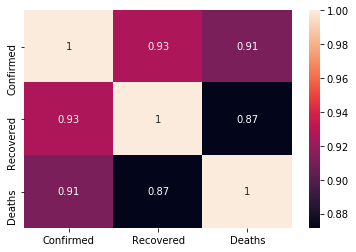

In [32]:
sns.heatmap(df_new.corr(),annot=True)

# setting the x and y variable

In [33]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [34]:
x.shape

(23177, 2)

In [35]:
y=y.values.reshape(y.shape[0],1)

In [36]:
y.shape

(23177, 1)

# Scaler

In [37]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x.shape

(23177, 2)

# Regression Process

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [41]:
def max_r2_score(rgr,x,y):
    max_score=0
    for r in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r)
        rgr.fit(x_train,y_train)
        pred=rgr.predict(x_test)
        score=r2_score(y_test,pred)
        print('score at',r,'is',score)
        if score>max_score:
            max_score=score
            r_state=r
    print('max score at the r state of',r_state,'is',max_score)
            
    return r_state
        

In [42]:
lr=LinearRegression()

In [43]:
sc=max_r2_score(lr,x,y)

score at 42 is 0.8287730238517369
score at 43 is 0.8378069259814829
score at 44 is 0.8378658628041168
score at 45 is 0.8350379017549077
score at 46 is 0.8387901804503722
score at 47 is 0.830765669614971
score at 48 is 0.8348265351062577
score at 49 is 0.8351359560282783
score at 50 is 0.8388419063468207
score at 51 is 0.836400050885496
score at 52 is 0.8330467343384867
score at 53 is 0.8397985877624043
score at 54 is 0.8391843194326449
score at 55 is 0.8420864316198449
score at 56 is 0.8460342753547817
score at 57 is 0.8304267984305143
score at 58 is 0.8453422329018327
score at 59 is 0.8382899733068538
score at 60 is 0.8260115106715212
score at 61 is 0.840314718242732
score at 62 is 0.845686940629152
score at 63 is 0.8389931037305535
score at 64 is 0.8426534503600839
score at 65 is 0.8419160022412644
score at 66 is 0.8406869023308118
score at 67 is 0.8382107163394141
score at 68 is 0.83815399603063
score at 69 is 0.8369293922158194
score at 70 is 0.843054809448812
score at 71 is 0.8446

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=100)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [46]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.8470095468712813


RMSE 0.17038175236748673


# Lasso

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [48]:
lsr=Lasso()
pr={'alpha':[.001,.01,.1,1]}
gs=GridSearchCV(lsr,pr,cv=10)
gs.fit(x,y)
gs.best_params_


{'alpha': 0.01}

In [49]:
lsr=Lasso(alpha=.01)
sc=max_r2_score(lsr,x,y)

score at 42 is 0.8282798046715678
score at 43 is 0.8373062299873882
score at 44 is 0.8372957187773368
score at 45 is 0.8341254286899105
score at 46 is 0.8382567052497625
score at 47 is 0.8303509177193793
score at 48 is 0.8343307364220783
score at 49 is 0.8347574812479758
score at 50 is 0.8383408487020008
score at 51 is 0.8358332357455939
score at 52 is 0.8321914534891043
score at 53 is 0.8394520154059456
score at 54 is 0.8385951559788878
score at 55 is 0.8415235153887172
score at 56 is 0.8450431193531488
score at 57 is 0.8301304200446089
score at 58 is 0.8445236796768623
score at 59 is 0.83780541254804
score at 60 is 0.825470230252852
score at 61 is 0.8397422409000941
score at 62 is 0.8451746103071391
score at 63 is 0.8383405279923648
score at 64 is 0.8419908492225158
score at 65 is 0.8414763904154529
score at 66 is 0.8397416152891093
score at 67 is 0.8375966303170823
score at 68 is 0.8374180741566121
score at 69 is 0.8364225255707418
score at 70 is 0.8422940745296641
score at 71 is 0.

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=100)
lsr.fit(x_train,y_train)
pred=lsr.predict(x_test)

In [51]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.8460644460834309


RMSE 0.17090721000942288


# Ridge

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [53]:
rdr=Ridge()
pr={'alpha':[.001,.01,.1,1]}
gs=GridSearchCV(rdr,pr,cv=10)
gs.fit(x,y)
gs.best_params_


{'alpha': 1}

In [54]:
rdr=Ridge(alpha=1)
sc=max_r2_score(rdr,x,y)

score at 42 is 0.8287729623280202
score at 43 is 0.8378081643763154
score at 44 is 0.8378659298334435
score at 45 is 0.8350417560026692
score at 46 is 0.838789948249395
score at 47 is 0.8307666916952121
score at 48 is 0.8348247656914813
score at 49 is 0.8351369866066787
score at 50 is 0.8388442137717238
score at 51 is 0.8364004487993357
score at 52 is 0.8330452019671231
score at 53 is 0.8397994897421348
score at 54 is 0.8391835486738857
score at 55 is 0.8420855307666244
score at 56 is 0.8460350530626914
score at 57 is 0.8304269320360749
score at 58 is 0.8453433649759755
score at 59 is 0.8382888448712285
score at 60 is 0.8260111204752433
score at 61 is 0.8403128810672728
score at 62 is 0.84568727079591
score at 63 is 0.8389941210759837
score at 64 is 0.8426539633503659
score at 65 is 0.8419161678360585
score at 66 is 0.8406870159677153
score at 67 is 0.8382096562767439
score at 68 is 0.8381555618600306
score at 69 is 0.8369286637443263
score at 70 is 0.8430570769670129
score at 71 is 0.

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=100)
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [56]:
print(r2_score(y_test,pred))

0.84701013368356


In [57]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

RMSE 0.1703814256078811


# kneighborsclassifier

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
knn=KNeighborsRegressor()
pr={'n_neighbors':range(1,30)}
gs=GridSearchCV(knn,pr,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 29}

In [60]:
knn=KNeighborsRegressor(n_neighbors=29)
sc=max_r2_score(knn,x,y)

score at 42 is 0.8691978077700577
score at 43 is 0.8807671769516683
score at 44 is 0.8782702645426201
score at 45 is 0.8777997234299248
score at 46 is 0.8844963472506315
score at 47 is 0.877571508475423
score at 48 is 0.8714783372205912
score at 49 is 0.8846006629339753
score at 50 is 0.8806316253367642
score at 51 is 0.8751844823669509
score at 52 is 0.8814448296074432
score at 53 is 0.8803159107773566
score at 54 is 0.8765033753328828
score at 55 is 0.8816862735309725
score at 56 is 0.8905786109356527
score at 57 is 0.8763137510419108
score at 58 is 0.8874036952136088
score at 59 is 0.8773532525392675
score at 60 is 0.8724420153952613
score at 61 is 0.8822426833866717
score at 62 is 0.8922475653567201
score at 63 is 0.8817795967893046
score at 64 is 0.8826106997339214
score at 65 is 0.8761921106703836
score at 66 is 0.8860977578659281
score at 67 is 0.8802027796938608
score at 68 is 0.8824325748877809
score at 69 is 0.880664353123313
score at 70 is 0.8834528112929354
score at 71 is 0

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=62)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [62]:
print(r2_score(y_test,pred))

0.8922475653567201


In [63]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

RMSE 0.14346057201908974


# Graientboostingregressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
gb=GradientBoostingRegressor()
pr={'learning_rate':[.001,.01,.1,1]}
gs=GridSearchCV(gb,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1}

In [66]:
gb=GradientBoostingRegressor(learning_rate=.1)
sc=max_r2_score(gb,x,y)

score at 42 is 0.8655997623778511
score at 43 is 0.8781642800747304
score at 44 is 0.8769483568129733
score at 45 is 0.87368104351793
score at 46 is 0.8819656108716643
score at 47 is 0.8741199521045899
score at 48 is 0.8706279303651687
score at 49 is 0.8814262499054736
score at 50 is 0.8798704795076715
score at 51 is 0.8755186285152021
score at 52 is 0.8787999584948227
score at 53 is 0.8799631758520101
score at 54 is 0.875679568692139
score at 55 is 0.8810590770489704
score at 56 is 0.8880977335262918
score at 57 is 0.8728079519793196
score at 58 is 0.8849735763301089
score at 59 is 0.8766958995952873
score at 60 is 0.870411155385268
score at 61 is 0.8811532851784052
score at 62 is 0.8853597740629724
score at 63 is 0.8801116436430798
score at 64 is 0.8814464431724945
score at 65 is 0.8795486989326267
score at 66 is 0.8838839417473683
score at 67 is 0.8786390287059581
score at 68 is 0.8784996916188239
score at 69 is 0.8783452945957283
score at 70 is 0.8815565855747851
score at 71 is 0.8

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=56)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)

In [68]:
print(r2_score(y_test,pred))

0.8880979022198386


In [69]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

RMSE 0.1463664267769834


# Cross Validation

In [70]:
cross_val_score(lr,x,y,cv=5).mean()

0.4509265216299035

In [71]:
cross_val_score(lsr,x,y,cv=5).mean()

0.48840048636917316

In [72]:
cross_val_score(rdr,x,y,cv=5).mean()

0.4510370350942643

In [73]:
cross_val_score(knn,x,y,cv=5).mean()

0.6657079832583929

In [74]:
cross_val_score(gb,x,y,cv=5).mean()

0.6788003501613876

in the process of cross validation we find that gradientboostingregressor is having heighest score so we select the gredientboostingregressor for the model

# saving the model

In [75]:
from sklearn.externals import joblib

In [76]:
joblib.dump(gb,'gb_model_covid_dataset.csv')

['gb_model_covid_dataset.csv']